Python script for calculating the protein enrichment or depletion abundance values for the top 10 (adjustable) proteins present in the  proteomic dataset.

---

Plots the log2 abundance vs protein name plot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Select processed proteomics file for analysis; files should be run first through Proteomic_Data_Perseus_to_df.ipynb

In [24]:
abund_file = '/content/drive/MyDrive/ProteinCoronaPredict_PayneLab/Input_Data/Proteomics/Abundance_Files/Bov Swiss Intensity _v1.csv'

Determine top 10 (adjustable) proteins in proteomic data

*   column 50 = FBS control sample
*   columns 31-49 = protein corona samples



In [25]:
df = pd.read_csv(abund_file, header=0)
grouped_dfs = []

np_data = df.columns[4:22]
fbs_control = df.columns[23]
protein_col = 'Entry'

# Calculate total abundance for protein corona samples
df['Total_NP_Abundance'] = df[np_data].sum(axis=1)

# Get the top 15 rows with the highest 'Total_NP_Abundance'
top_10 = df.nlargest(10, 'Total_NP_Abundance')

# Print the corresponding 'Entry' column and 'Total_NP_Abundance' values
print(top_10[[protein_col, 'Total_NP_Abundance']])



     Entry  Total_NP_Abundance
0   P02769          543.904350
1   P12763          205.892767
2   P01966           88.788611
3   P34955           75.038506
4   Q2UVX4           64.126303
5   P15497           51.873261
6   P00735           51.344079
9   Q7SIH1           45.595708
7   Q03247           45.348461
11  P56652           42.545729


In [26]:
# Print the corresponding 'Entry' column, 'Total_NP_Abundance', and columns in np_data
top_10_table = top_10[[protein_col, 'Total_NP_Abundance'] + list(np_data)]
print(top_10_table)

     Entry  Total_NP_Abundance         31         32         33         34  \
0   P02769          543.904350  15.848661  19.892221  17.616806  19.901283   
1   P12763          205.892767  30.560228   7.608836   4.708894   5.765331   
2   P01966           88.788611   3.770612  13.841978   1.187971   2.615654   
3   P34955           75.038506   3.186216   3.005894   2.930729   3.093795   
4   Q2UVX4           64.126303   1.341643   0.542661  17.596677  13.893732   
5   P15497           51.873261   7.092907   4.932383   1.233644   2.052370   
6   P00735           51.344079   1.350949   6.365264   1.705137   1.249609   
9   Q7SIH1           45.595708   2.501967   0.961186   2.588964   2.526447   
7   Q03247           45.348461   0.561120   1.997849   1.306269   1.258204   
11  P56652           42.545729   0.132400   0.061389   0.589098   0.515592   

           35         36         37         38         39         40  \
0   30.394498  33.385218  41.411284  26.935202  32.543373  33.706021 

Calculate the log2 fold change for protein abundance

In [27]:
# Calculate the log2 fold change for each column in np_data and fbs_control
log2_fold_change = np.log2(top_10[np_data].div(top_10[fbs_control], axis=0))

# Add the 'Entry' column for reference
log2_fold_change[protein_col] = top_10[protein_col].values

# Reorder columns to have 'Entry' first
columns = [protein_col] + list(np_data)
log2_fold_change = log2_fold_change[columns]

# Display the resulting table
print(log2_fold_change)

     Entry        31        32        33        34        35        36  \
0   P02769 -1.777086 -1.449243 -1.624494 -1.448585 -0.837637 -0.702237   
1   P12763  0.961970 -1.043938 -1.736226 -1.444210 -0.796684 -0.568480   
2   P01966  2.878120  4.754300  1.211821  2.350494  1.167144  1.013345   
3   P34955 -1.244605 -1.328654 -1.365189 -1.287071 -1.246415 -1.150346   
4   Q2UVX4  0.788857 -0.517021  4.502088  4.161219  2.564014  1.716021   
5   P15497  2.569360  2.045268  0.045909  0.780274  0.767870  0.463203   
6   P00735  3.925915  6.162162  4.261830  3.813418  6.117725  6.178018   
9   Q7SIH1  0.016519 -1.363656  0.065831  0.030567  0.375742  0.551693   
7   Q03247  5.028422  6.860488  6.247493  6.193407  6.329109  4.474809   
11  P56652 -0.166535 -1.275401  1.987065  1.794786  5.316085  5.695025   

          37        38        39        40        41        42        43  \
0  -0.391423 -1.011954 -0.739083 -0.688441 -0.346288 -0.991064 -0.320380   
1  -0.369902 -0.820293 -0.612451 

Determine protein names that correspond with protein 'Entry' ID

---

Make plot that has x-axis with protein names

In [28]:
print(top_10[['prot2', 'Total_NP_Abundance']])

# Add the 'Entry' column for reference
log2_fold_change['prot2'] = top_10['prot2'].values

# Melt the DataFrame for easier plotting
melted_data = log2_fold_change.melt(id_vars=['prot2'], value_vars=np_data,
                                    var_name='Sample', value_name='Log2_Fold_Change')


                                            prot2  Total_NP_Abundance
0                                        Albumin           543.904350
1                        Alpha-2-HS-glycoprotein           205.892767
2                       Hemoglobin subunit alpha            88.788611
3                         Alpha-1-antiproteinase            75.038506
4                                  Complement C3            64.126303
5                             Apolipoprotein A-I            51.873261
6                                    Prothrombin            51.344079
9                          Alpha-2-macroglobulin            45.595708
7                               Apolipoprotein E            45.348461
11  Inter-alpha-trypsin inhibitor heavy chain H3            42.545729


In [29]:
# new_legend_items = {
#     '31': 'Carboxyl-PS 200 nm NP, 10% FBS',
#     '32': 'Carboxyl-PS 200 nm NP, 100% FBS',
#     '33': 'Citrate-mNPs, 10% FBS',
#     '34': 'Citrate-mNPl, 10% FBS',
#     '35': 'PEI-mNPs, 10% FBS',
#     '36': 'PEI-mNPl, 10% FBS',
#     '37': 'PVP-Au-mNPl, 100% FBS',
#     '38': 'PVP-Au-mNPs, 10% FBS',
#     '39': 'PVP-Au-mNPs, 100% FBS',
#     '40': 'Citrate-mNPl, 100% FBS',
#     '41': 'PEI-mNPl, 100% FBS',
#     '42': 'Citrate-mNPs, 100% FBS',
#     '43': 'PEI-mNPs, 100% FBS',
#     '44': 'PEI-Au-mNPl, 10% FBS',
#     '45': 'PEG-Au-mNPl, 100% FBS',
#     '46': 'PEI-Au-mNPl, 100% FBS',
#     '47': 'PEI-Au-mNPs, 100% FBS',
#     '48': 'PEG-Carboxyl NP, 100% FBS',
#     '49': 'PEG-Carboxyl NP, 100% FBS (b)',
# }

# new_legend_items = {
#     '31': 'COOH-pNP, 10% FBS',
#     '32': 'COOH-pNP, 100% FBS',
#     '33': 'Citrate-mNP$_S$, 10% FBS',
#     '34': 'Citrate-mNP$_L$, 10% FBS',
#     '35': 'PEI-mNP$_S$, 10% FBS',
#     '36': 'PEI-mNP$_L$, 10% FBS',
#     '37': 'PVP-Au-mNP$_L$, 100% FBS',
#     '38': 'PVP-Au-mNP$_S$, 10% FBS',
#     '39': 'PVP-Au-mNP$_S$, 100% FBS',
#     '40': 'Citrate-mNP$_L$, 100% FBS',
#     '41': 'PEI-mNP$_L$, 100% FBS',
#     '42': 'Citrate-mNP$_S$, 100% FBS',
#     '43': 'PEI-mNP$_S$, 100% FBS',
#     '44': 'PEI-Au-mNP$_L$, 10% FBS',
#     '45': 'PEG-Au-mNP$_L$, 100% FBS',
#     '46': 'PEI-Au-mNP$_L$, 100% FBS',
#     '47': 'PEI-Au-mNP$_S$, 100% FBS',
#     '48': 'PEG-pNP, 100% FBS',
#     #'49': 'PEG-pNP, 100% FBS (b)',
# }

# removing 10% FBS notation

new_legend_items = {
    '31': 'COOH-pNP',
    '33': 'Citrate-mNP$_S$',
    '34': 'Citrate-mNP$_L$',
    '35': 'PEI-mNP$_S$',
    '36': 'PEI-mNP$_L$',
    '38': 'PVP-Au-mNP$_S$',
    '44': 'PEI-Au-mNP$_L$'
    #'49': 'PEG-pNP, 100% FBS (b)',
}



# Map the 'Sample' column in melted_data to the new sample names
melted_data['Sample'] = melted_data['Sample'].map(new_legend_items)


All NPs at 10% Protein Incubation


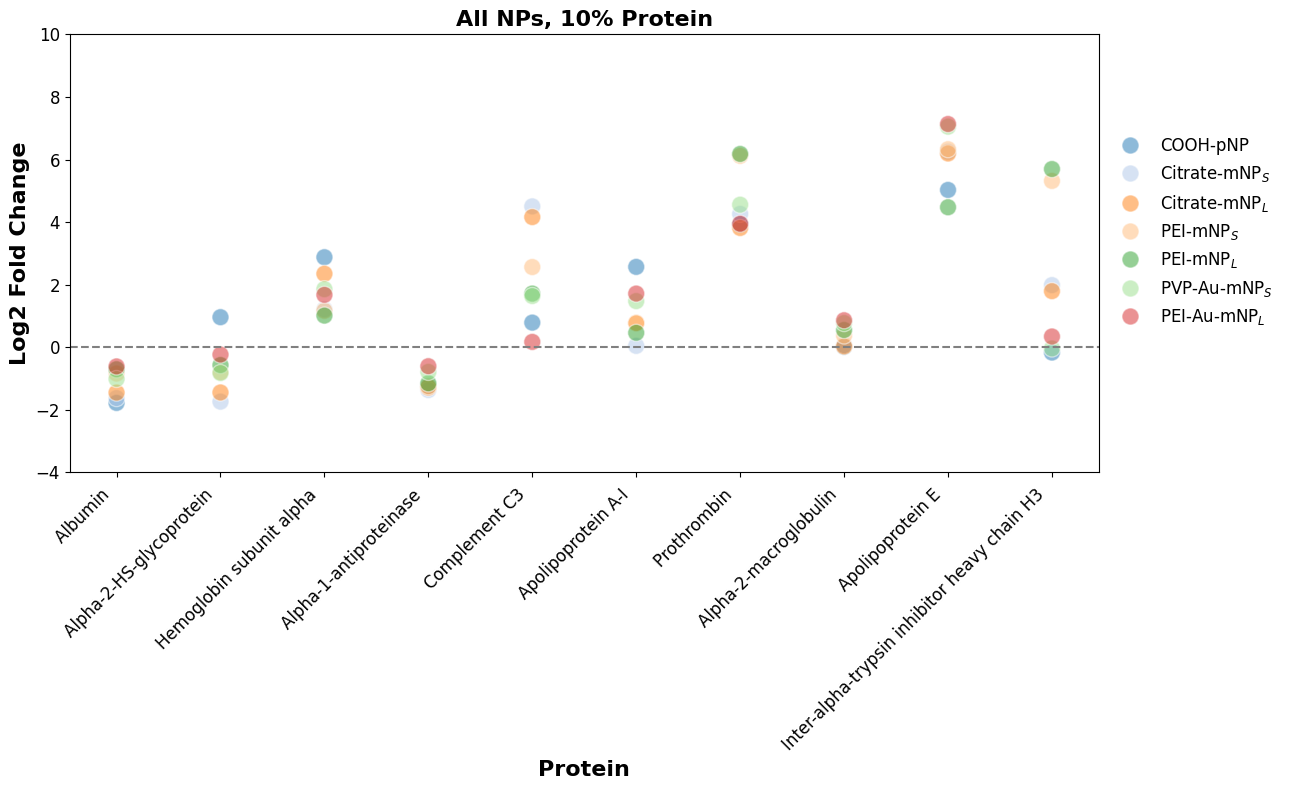


Legend Items and their Descriptions:
31: COOH-pNP
33: Citrate-mNP$_S$
34: Citrate-mNP$_L$
35: PEI-mNP$_S$
36: PEI-mNP$_L$
38: PVP-Au-mNP$_S$
44: PEI-Au-mNP$_L$


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

print('All NPs at 10% Protein Incubation') # options are: Magnetic 10% Protein, Magnetic 100% Protein, Nonmagnetic

# Specify the subset of NPs you want to display on the plot
selected_samples = ['COOH-pNP', 'Citrate-mNP$_S$', 'Citrate-mNP$_L$', 'PEI-mNP$_S$', 'PEI-mNP$_L$', 'PVP-Au-mNP$_S$', 'PEI-Au-mNP$_L$']

# Filter the melted_data to include only the selected NPs
filtered_data = melted_data[melted_data['Sample'].isin(selected_samples)]

# Create the plot
plt.figure(figsize=(13, 8))

sns.scatterplot(data=filtered_data, x='prot2', y='Log2_Fold_Change', hue='Sample',
                palette='tab20', s=150, alpha=0.5)

# Add a dashed line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--')

# Set the y-axis limits
plt.ylim(-4, 10)

# Customize the x-axis labels rotation and font size
plt.xticks(rotation=45, ha='right', fontsize=12)

# Customize the y-axis font size
plt.yticks(fontsize=12)

# Customize the legend
plt.legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 0.80), fontsize=12, title_fontsize='18', frameon=False)

# Labels and title with increased font sizes

plt.xlabel('Protein', fontsize=16, fontweight='bold')
plt.ylabel('Log2 Fold Change', fontsize=16, fontweight='bold')

plt.title('All NPs, 10% Protein', fontweight='bold', fontsize=16)

# Add grid lines
plt.grid(False)

plt.tight_layout()

# Show the plot
plt.show()

#plt.savefig('')
# Print the legend items and their descriptions
print("\nLegend Items and their Descriptions:")
for key, value in new_legend_items.items():
    print(f"{key}: {value}")


Old code
---

Plot figure

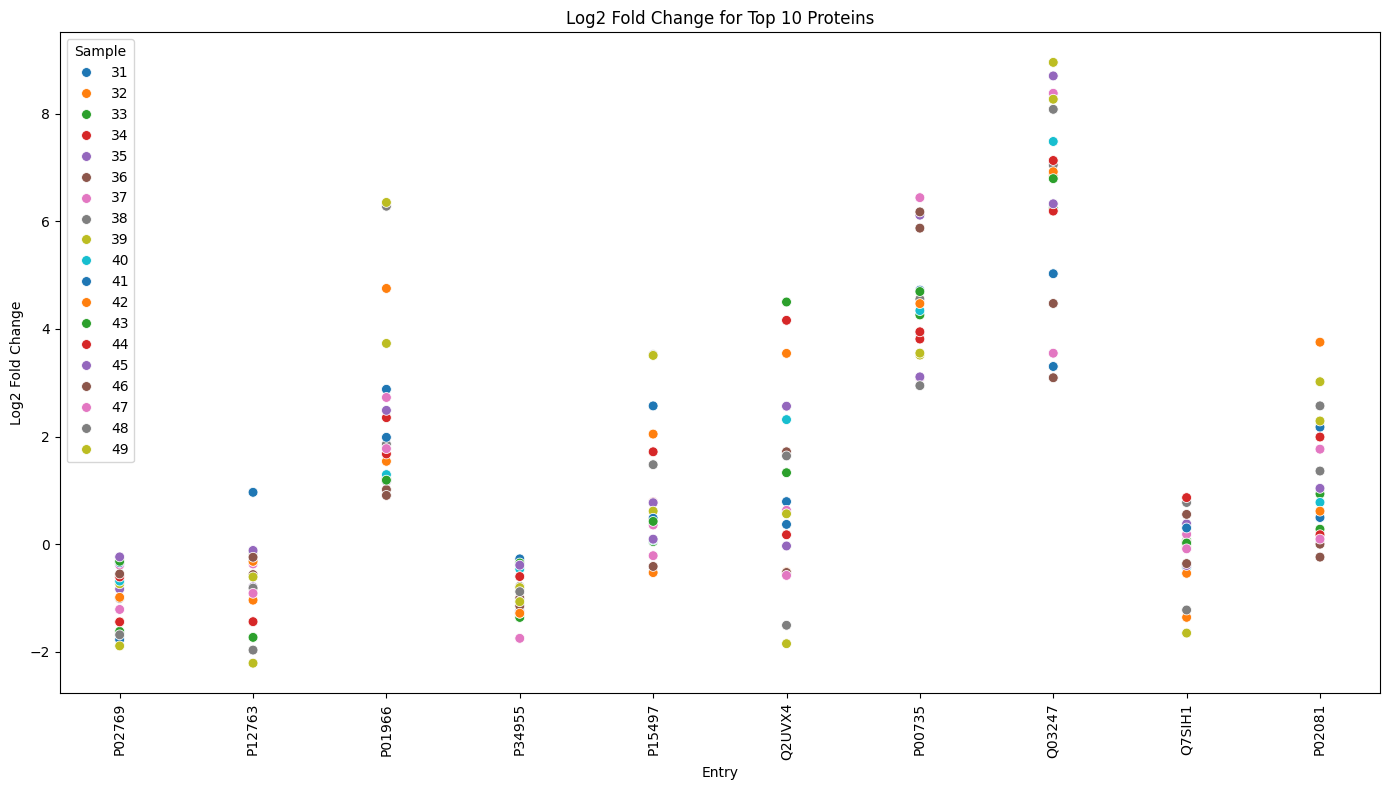

In [ ]:
# Add the 'Entry' column for reference
log2_fold_change[protein_col] = top_10[protein_col].values

# Melt the DataFrame for easier plotting
melted_data = log2_fold_change.melt(id_vars=[protein_col], value_vars=np_data,
                                    var_name='Sample', value_name='Log2_Fold_Change')

# Create the plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=melted_data, x=protein_col, y='Log2_Fold_Change', hue='Sample', palette='tab10', s=50)
plt.xlabel('Entry')
plt.ylabel('Log2 Fold Change')
plt.title('Log2 Fold Change for Top 10 Proteins')
plt.xticks(rotation=90)
plt.legend(title='Sample')
plt.tight_layout()

# Show the plot
plt.show()

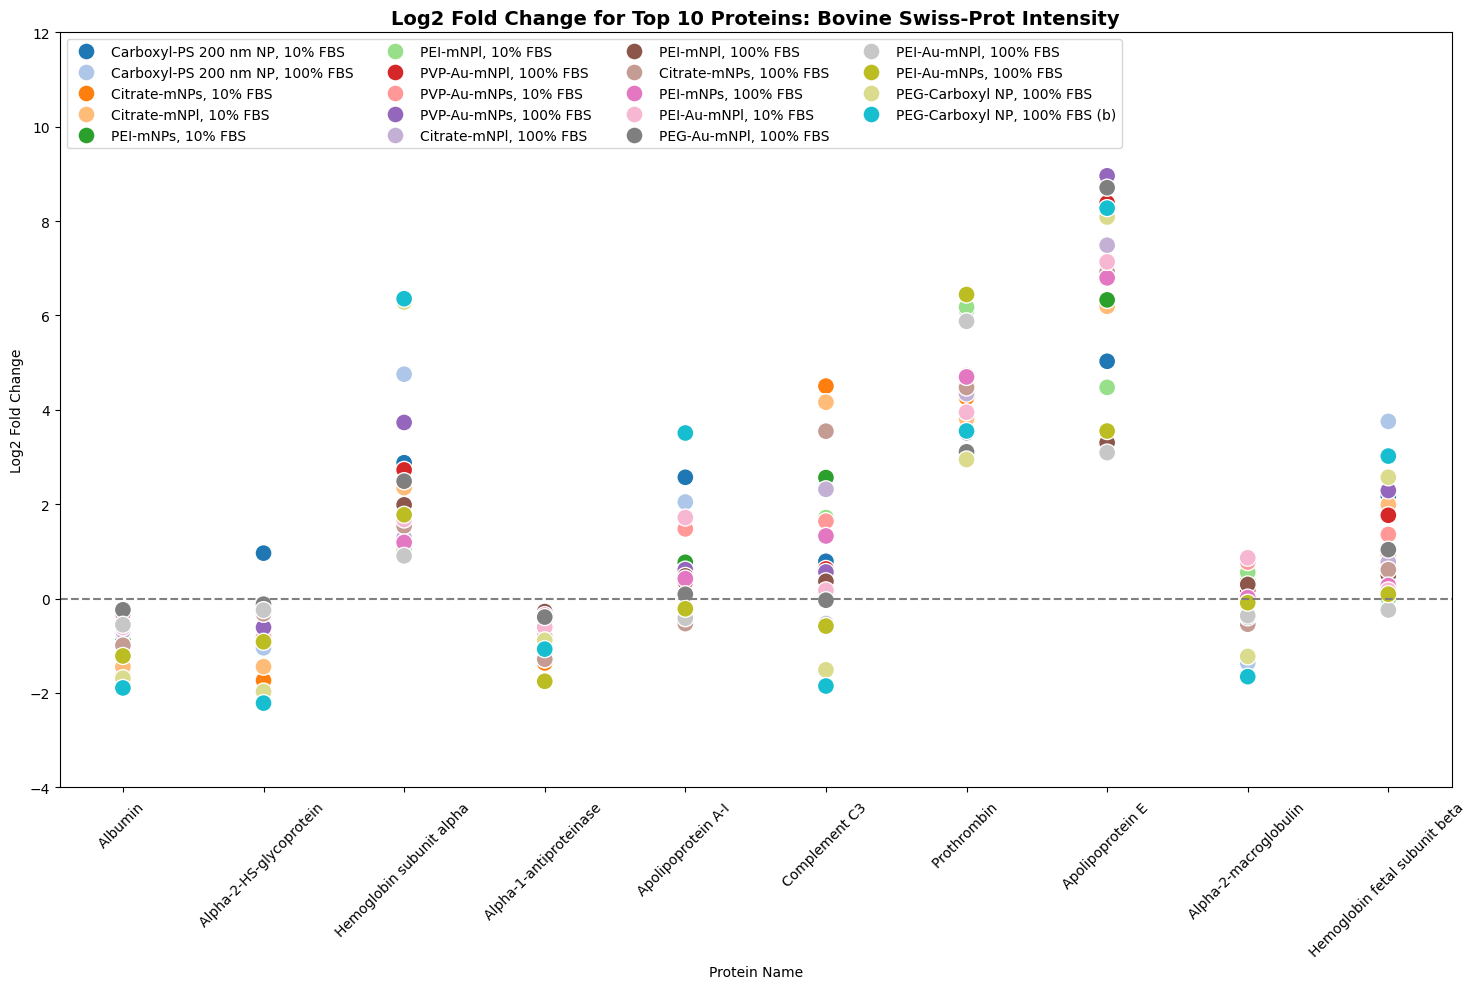


Legend Items and their Descriptions:
31: Carboxyl-PS 200 nm NP, 10% FBS
32: Carboxyl-PS 200 nm NP, 100% FBS
33: Citrate-mNPs, 10% FBS
34: Citrate-mNPl, 10% FBS
35: PEI-mNPs, 10% FBS
36: PEI-mNPl, 10% FBS
37: PVP-Au-mNPl, 100% FBS
38: PVP-Au-mNPs, 10% FBS
39: PVP-Au-mNPs, 100% FBS
40: Citrate-mNPl, 100% FBS
41: PEI-mNPl, 100% FBS
42: Citrate-mNPs, 100% FBS
43: PEI-mNPs, 100% FBS
44: PEI-Au-mNPl, 10% FBS
45: PEG-Au-mNPl, 100% FBS
46: PEI-Au-mNPl, 100% FBS
47: PEI-Au-mNPs, 100% FBS
48: PEG-Carboxyl NP, 100% FBS
49: PEG-Carboxyl NP, 100% FBS (b)


In [ ]:
# Create the plot
plt.figure(figsize=(15, 10))

sns.scatterplot(data=melted_data, x='prot2', y='Log2_Fold_Change', hue='Sample', palette='tab20', s=150)

# Add a dashed line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--')

# Set the y-axis limits
plt.ylim(-4, 12)
# Customize the x-axis labels rotation
plt.xticks(rotation=45)

# Customize the legend
plt.legend(loc='upper left', ncol=4)

# Labels and title
plt.xlabel('Protein Name')
plt.ylabel('Log2 Fold Change')
plt.title('Log2 Fold Change for Top 10 Proteins: Bovine Swiss-Prot Intensity', fontweight='bold', fontsize=14)

plt.tight_layout()

# Show the plot
plt.show()


# Print the legend items and their descriptions
print("\nLegend Items and their Descriptions:")
for key, value in new_legend_items.items():
    print(f"{key}: {value}")